In [1]:
import pandas as pd
import numpy as np

In [2]:
import requests
import datetime
import time

In [3]:
def get_commodity_code(long_code):
    # get 'rb' out of 'rb2401'
    # return  'rb'
    com_code = ''
    for char in long_code:
        try:
            int(char)
            break
        except ValueError:
            com_code += char
    return com_code


# -----------------------------------------------------------------------------
def get_full_code(long_code):
    # add '2' to MA301, make it MA2301, for CZCE only
    long_code = str.upper(long_code)
    com_c = get_commodity_code(long_code)
    ym = long_code[len(com_c):]

    if 3 == len(ym):
        full_code = ''.join([com_c, '2',ym])
    else:
        full_code = long_code

    return full_code


# -----------------------------------------------------------------------------
def get_sina_future_data(long_code, market="CF", adjust='0'):
    """
    期货的实时行情数据
    http://vip.stock.finance.sina.com.cn/quotes_service/view/qihuohangqing.html#titlePos_1
    :param symbol: 合约名称的字符串组合
    :type symbol: str
    :param market: CF 为商品期货
    :type market: str
    :param adjust: '1' or '0'; 字符串的 0 或 1
    :type adjust: str
    :return: 期货的实时行情数据
    :return type: list

    return
    [
        '"螺纹钢2401',   # 0 名字+到期年月
        '150000',       # 1 ?
        '3690.000',     # 2 开盘价
        '3717.000',     # 3 最高价
        '3684.000',     # 4 最低价
        '3690.000',     # 5 昨收
        '3690.000',     # 6 买一
        '3691.000',     # 7 卖一
        '3690.000',     # 8 最新价
        '3700.000',     # 9 结算价
        '3684.000',     # 10 昨结算
        '63',           # 11买一挂单量
        '10',           # 12 卖一挂单量
        '1697143.000',  # 13 持仓量
        '1021754',      # 14 成交量
        '沪',           # 15 交易所
        '螺纹钢',        # 16 商品品种
        '2023-09-28',   # 17 日期
        '1',
        '',
        '',
        '',
        '',
        '',
        '',
        '',
        '',
        '3700.991',
        '0.000',
        '0',
        '0.000',
        '0',
        '0.000',
        '0',
        '0.000',
        '0',
        '0.000',
        '0',
        '0.000',
        '0',
        '0.000',
        '0',
        '0.000',
        '0"'
     ]
    """
    full_code = get_full_code(long_code)
    subscribe_list = ','.join(['nf_' + item.strip() for item in full_code.split(',')])
    url = f"https://hq.sinajs.cn/rn={round(time.time() * 1000)}&list={subscribe_list}"
    headers = {
        'Accept': '*/*',
        'Accept-Encoding': 'gzip, deflate',
        'Accept-Language': 'zh-CN,zh;q=0.9,en;q=0.8',
        'Cache-Control': 'no-cache',
        'Host': 'hq.sinajs.cn',
        'Pragma': 'no-cache',
        'Proxy-Connection': 'keep-alive',
        'Referer': 'http://vip.stock.finance.sina.com.cn/',
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/97.0.4692.71 Safari/537.36'
    }
    r = requests.get(url, headers=headers)

    # fut_data is like ["PVC2310  150132  6008.000  6125.000  6004.000  ...  0  0.000  0  0.000  0"]
    fut_data = [item.strip().split("=")[1].split(",") for item in r.text.split(";") if item.strip() != ""][0]
    return fut_data

In [4]:
get_sina_future_data('rb0')

['"螺纹钢连续',
 '230000',
 '3874.000',
 '3881.000',
 '3844.000',
 '0.000',
 '3857.000',
 '3859.000',
 '3859.000',
 '0.000',
 '3878.000',
 '4',
 '164',
 '1592029.000',
 '500712',
 '沪',
 '螺纹钢',
 '2023-11-13',
 '1',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '3861.769',
 '0.000',
 '0',
 '0.000',
 '0',
 '0.000',
 '0',
 '0.000',
 '0',
 '0.000',
 '0',
 '0.000',
 '0',
 '0.000',
 '0',
 '0.000',
 '0"']

In [5]:
from bs4 import BeautifulSoup
url = "http://finance.sina.com.cn/futures/quotes/CU0.shtml"
response = requests.get(url)
html = response.text

soup = BeautifulSoup(html, "html.parser")
soup

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">

<html xmlns="http://www.w3.org/1999/xhtml">
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="IE=EmulateIE7" http-equiv="X-UA-Compatible"/>
<meta content="always" name="referrer"/>
<script src="//hq.sinajs.cn/list=sys_time" type="text/javascript"></script>
<title>Í­2312(CU0)ÆÚ»õÐÐÇé,ÐÂÎÅ,±¨¼Û_ÐÂÀË²Æ¾­_ÐÂÀËÍø</title>
<meta content="Í­,Í­2312,CU0,Í­2312ÆÚ»õÐÐÇé,CU0ÆÚ»õÐÐÇé,Í­2312±¨¼Û,Í­2312ÐÂÎÅ,ÐÂÀËÆÚ»õ" name="keywords"/>
<meta content="ÐÂÀË²Æ¾­-ÆÚ»õÆµµÀÎªÄúÌá¹©Í­2312(CU0)ÆÚ»õÐÐÇé,ÆÚ»õ×ÊÁÏ,,ÆÚ»õÐÂÎÅ,±¨¼Û,»ú¹¹±¨¸æ,ÆÀÂÛ,ÏÖ»õ¼Û¸ñ,³Ö²Ö·ÖÎöµÈÓëÍ­2312(Í­2312)ÆÚ»õÏà¹ØµÄÐÅÏ¢Óë·þÎñ." name="description"/>
<link href="//stock2.finance.sina.com.cn/futures/page2012/js/widget/dialog/dialog.css?v=20190814" rel="Stylesheet" type="text/css"/>
<link href="//n.sinaimg.cn/finance/futures/base.css?v=20190814" rel="Stylesheet" type="text/css"/>
<li

In [7]:
data=pd.read_excel('data\SHFE_al2201.xlsx')
data.head()

,datetime,open,high,low,close,volume,open_oi,close_oi,duration
0,2021-12-17 22:36:00,19785,19785,19775,19780,298,132482,132439,60
1,2021-12-17 22:37:00,19780,19795,19780,19790,426,132439,132420,60
2,2021-12-17 22:38:00,19790,19800,19790,19800,259,132420,132406,60
3,2021-12-17 22:39:00,19800,19805,19795,19800,146,132406,132410,60
4,2021-12-17 22:40:00,19800,19800,19790,19790,114,132410,132410,60


In [8]:
data['datetime'].max()

Timestamp('2022-01-17 14:59:00')

In [9]:
data.shape

(8964, 9)

In [10]:
np.ptp(data.close)//100

24

In [11]:
data.open[0]

19785

In [12]:
np.arange(data.open.iloc[0],data.close.iloc[-1],np.ptp(data.close)//100)

array([19785, 19809, 19833, 19857, 19881, 19905, 19929, 19953, 19977,
       20001, 20025, 20049, 20073, 20097, 20121, 20145, 20169, 20193,
       20217, 20241, 20265, 20289, 20313, 20337, 20361, 20385, 20409,
       20433, 20457, 20481, 20505, 20529, 20553, 20577, 20601, 20625,
       20649, 20673, 20697, 20721, 20745, 20769, 20793, 20817, 20841,
       20865, 20889, 20913, 20937, 20961, 20985, 21009, 21033, 21057,
       21081, 21105, 21129, 21153], dtype=int64)

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

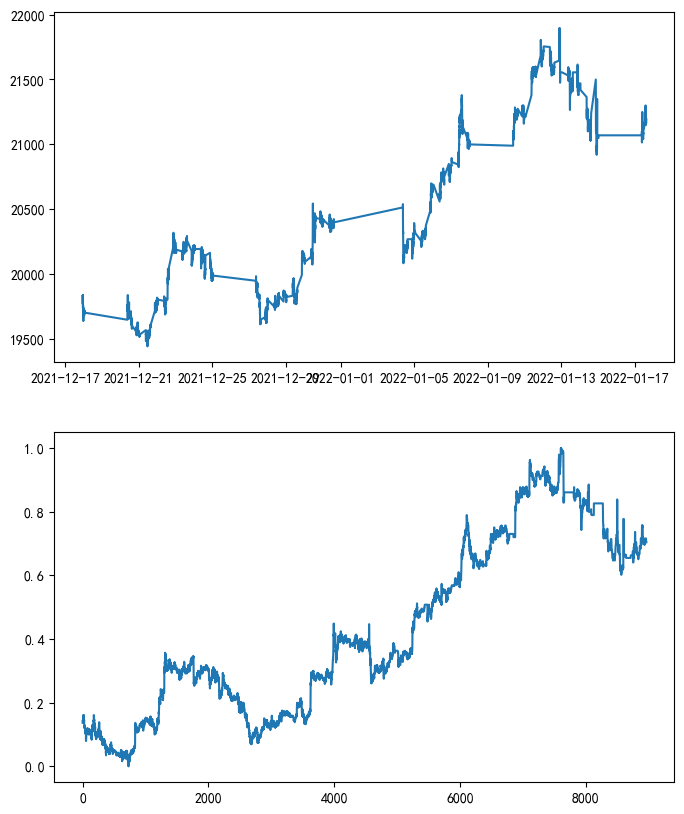

In [14]:
data['norm']=(data.close-data.close.min())/(data.close.max()-data.close.min())
fig,axes=plt.subplots(2,1,figsize=(8,10))
axes[0].plot(data['datetime'],data['close'])
axes[1].plot(data['norm'])

In [15]:
#np.linspace(data.close.min(),data.close.max(),100)
rg=np.arange(data.close.min(),data.close.max(),np.ptp(data.close)//100)
rg

array([19445, 19469, 19493, 19517, 19541, 19565, 19589, 19613, 19637,
       19661, 19685, 19709, 19733, 19757, 19781, 19805, 19829, 19853,
       19877, 19901, 19925, 19949, 19973, 19997, 20021, 20045, 20069,
       20093, 20117, 20141, 20165, 20189, 20213, 20237, 20261, 20285,
       20309, 20333, 20357, 20381, 20405, 20429, 20453, 20477, 20501,
       20525, 20549, 20573, 20597, 20621, 20645, 20669, 20693, 20717,
       20741, 20765, 20789, 20813, 20837, 20861, 20885, 20909, 20933,
       20957, 20981, 21005, 21029, 21053, 21077, 21101, 21125, 21149,
       21173, 21197, 21221, 21245, 21269, 21293, 21317, 21341, 21365,
       21389, 21413, 21437, 21461, 21485, 21509, 21533, 21557, 21581,
       21605, 21629, 21653, 21677, 21701, 21725, 21749, 21773, 21797,
       21821, 21845, 21869, 21893], dtype=int64)

In [16]:
data['cut_ptp']=pd.cut(data.close,bins=rg,labels=np.arange(rg.shape[0]-1))
data['cut_ptp']

0       13
1       14
2       14
3       14
4       14
        ..
8959    72
8960    71
8961    71
8962    71
8963    71
Name: cut_ptp, Length: 8964, dtype: category
Categories (102, int32): [0 < 1 < 2 < 3 ... 98 < 99 < 100 < 101]

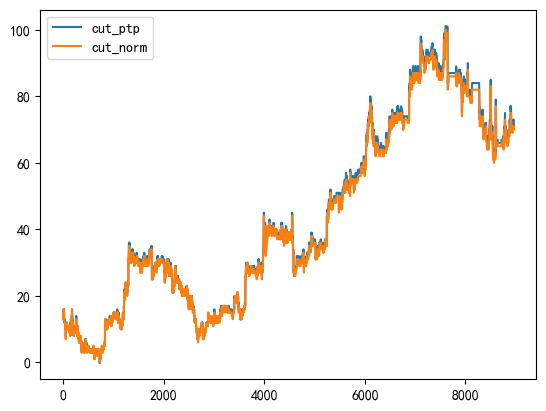

In [17]:
data['cut_norm']=(100*data['norm']).astype(int)

plt.plot(data['cut_ptp'],label='cut_ptp')
plt.plot(data['cut_norm'],label='cut_norm')
plt.legend()

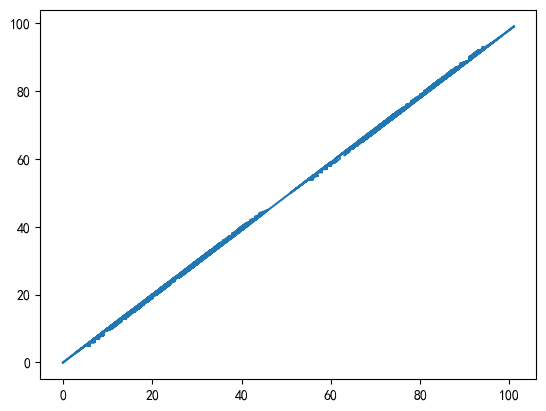

In [18]:
plt.plot(data['cut_ptp'],data['cut_norm'])

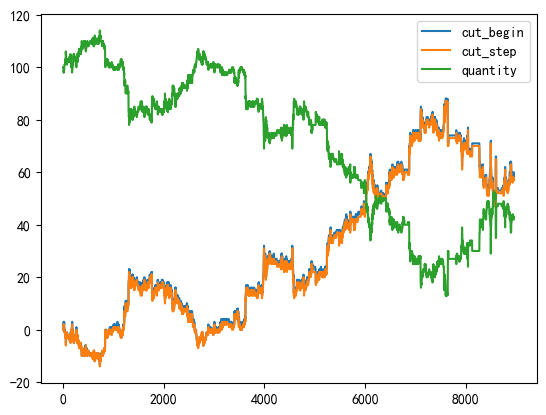

In [19]:
data['cut_begin']=data['cut_ptp'].astype(float)-data['cut_ptp'].iloc[0]
data['diff_begin']=data['close']-data['open'].iloc[0]
data['cut_step']=(data['diff_begin']/(np.ptp(data.close)//100)).astype(int)
data['quantity']=100-data['cut_step']*1
plt.plot(data['cut_begin'],label='cut_begin')
plt.plot(data['cut_step'],label='cut_step')
plt.plot(data['quantity'],label='quantity')
plt.legend()

<Axes: title={'center': '网格实时持仓盈亏点'}>

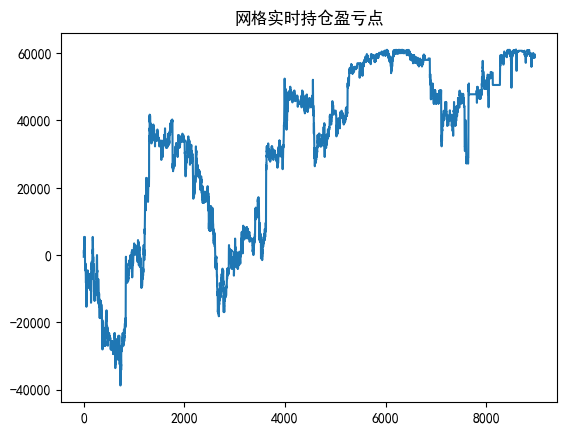

In [20]:
data['持仓盈亏点']=data['diff_begin']*data['quantity']
data['持仓盈亏点'].plot(title='网格实时持仓盈亏点')

In [21]:
data['diff_begin']*data['quantity']

0        -500
1         500
2        1500
3        1500
4         500
        ...  
8959    58590
8960    59555
8961    59555
8962    59555
8963    59555
Length: 8964, dtype: int64

In [22]:
data['cut_step'].min(),data['cut_step'].max()

(-14, 87)

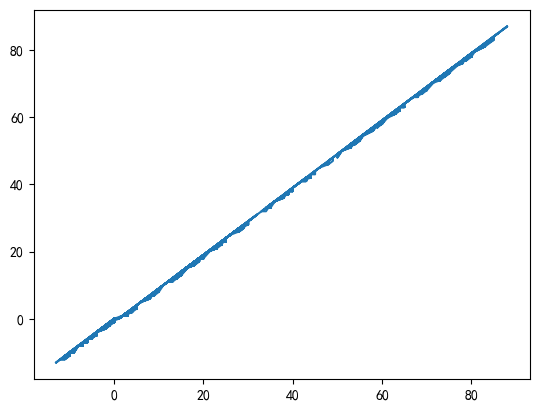

In [23]:
plt.plot(data['cut_begin'],data['cut_step'])

<Axes: >

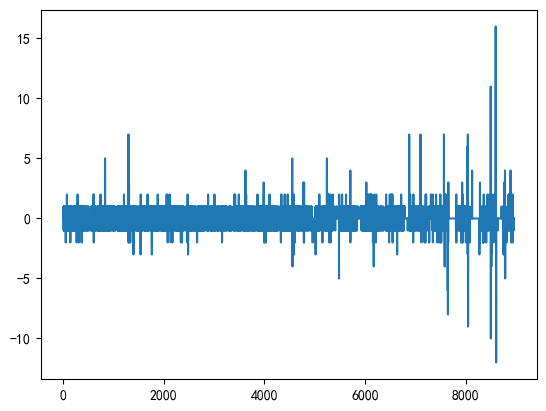

In [24]:
data['cutdiff']=data['cut_step'].diff(1)#-.shift(1)
data['cutdiff'].plot()

<Axes: ylabel='Density'>

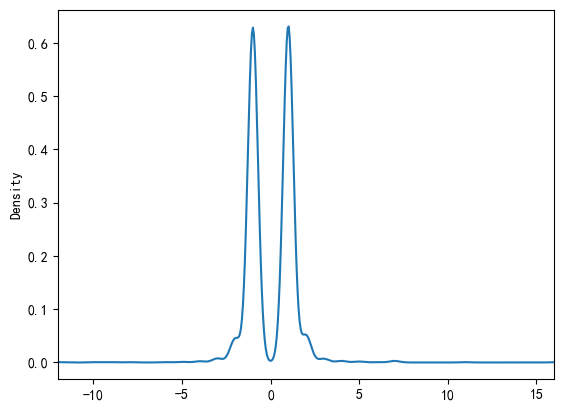

In [25]:
data['cutdiff'].replace(0,np.nan).plot.kde(xlim=[data['cutdiff'].min(),data['cutdiff'].max()])

<Axes: xlabel='cutdiff'>

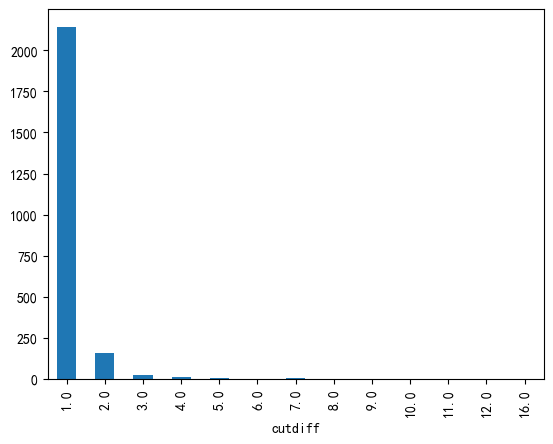

In [26]:
np.abs(data['cutdiff']).value_counts().sort_index()[1:].plot.bar()

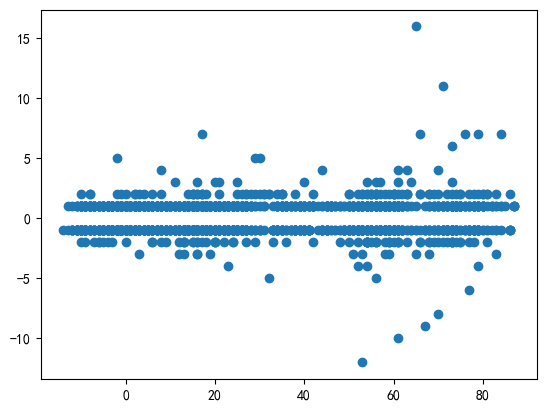

In [27]:
plt.scatter(data['cut_step'],data['cutdiff'].replace(0,np.nan))

In [28]:
data['cutdiff'].sum()

57.0

In [29]:
#交易总次数
data['signdiff']=np.sign(data['cutdiff'])#np.where(data['cutdiff']>0,1,np.where(data['cutdiff']<0,-1,0))
np.abs(data['signdiff']).sum()

2355.0

In [30]:
#交易次数
data.where(data['cutdiff']!=0).dropna()

,datetime,open,high,low,close,volume,open_oi,close_oi,duration,norm,cut_ptp,cut_norm,cut_begin,diff_begin,cut_step,quantity,持仓盈亏点,cutdiff,signdiff
8,2021-12-17 22:44:00,19805.0,19820.0,19795.0,19820.0,354.0,132453.0,132576.0,60.0,0.153061,15,15.0,2.0,35.0,1.0,99.0,3465.0,1.0,1.0
10,2021-12-17 22:46:00,19815.0,19845.0,19810.0,19835.0,970.0,132480.0,132668.0,60.0,0.159184,16,15.0,3.0,50.0,2.0,98.0,4900.0,1.0,1.0
12,2021-12-17 22:48:00,19840.0,19840.0,19820.0,19830.0,687.0,132862.0,132986.0,60.0,0.157143,16,15.0,3.0,45.0,1.0,99.0,4455.0,-1.0,-1.0
15,2021-12-17 22:51:00,19825.0,19835.0,19825.0,19835.0,245.0,132788.0,132754.0,60.0,0.159184,16,15.0,3.0,50.0,2.0,98.0,4900.0,1.0,1.0
17,2021-12-17 22:53:00,19835.0,19835.0,19820.0,19825.0,398.0,132733.0,132853.0,60.0,0.155102,15,15.0,2.0,40.0,1.0,99.0,3960.0,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8921,2022-01-17 14:17:00,21180.0,21180.0,21170.0,21170.0,15.0,14940.0,14940.0,60.0,0.704082,71,70.0,58.0,1385.0,57.0,43.0,59555.0,-1.0,-1.0
8929,2022-01-17 14:25:00,21170.0,21180.0,21170.0,21180.0,5.0,14930.0,14930.0,60.0,0.708163,72,70.0,59.0,1395.0,58.0,42.0,58590.0,1.0,1.0
8934,2022-01-17 14:30:00,21180.0,21180.0,21150.0,21150.0,5.0,14930.0,14930.0,60.0,0.695918,71,69.0,58.0,1365.0,56.0,44.0,60060.0,-2.0,-1.0
8935,2022-01-17 14:31:00,21150.0,21185.0,21150.0,21185.0,10.0,14930.0,14930.0,60.0,0.710204,72,71.0,59.0,1400.0,58.0,42.0,58800.0,2.0,1.0


In [31]:
#交易总步数
np.abs(data['cutdiff']).sum()

2713.0

In [32]:
#放大倍数
2713/data['cut_step'].iloc[-1]#np.arange(data.open.iloc[0],data.close.iloc[-1],np.ptp(data.close)//100).shape

47.59649122807018

In [33]:
#交易总步长
np.abs(data['cutdiff']).sum()*(np.ptp(data.close)//100)

65112.0

In [34]:
data.close.iloc[-1]-data.open.iloc[0],data['diff_begin'].iloc[-1]

(1385, 1385)

In [35]:
#放大倍数
65112.0/1385

47.01227436823105

In [36]:
#开次数
(data['cutdiff']<0).sum()

1167

In [37]:
#平次数
(data['cutdiff']>0).sum()

1188

<Axes: title={'center': '历史平仓步数累计'}>

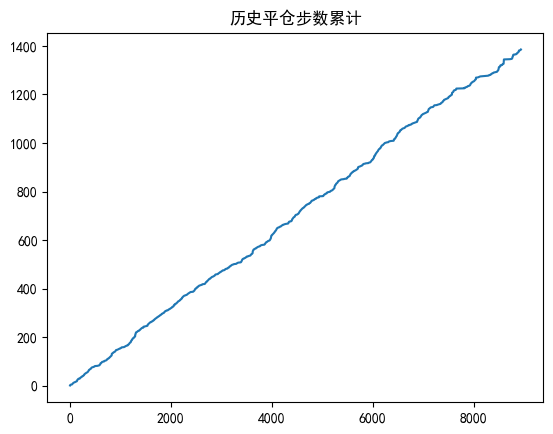

In [38]:
data['平仓收益点']=np.where(data['cutdiff']>0,data['cutdiff']*(np.ptp(data.close)//100)*1,0).cumsum()
data.loc[data['cutdiff']>0,'cutdiff'].cumsum().plot(title='历史平仓步数累计')

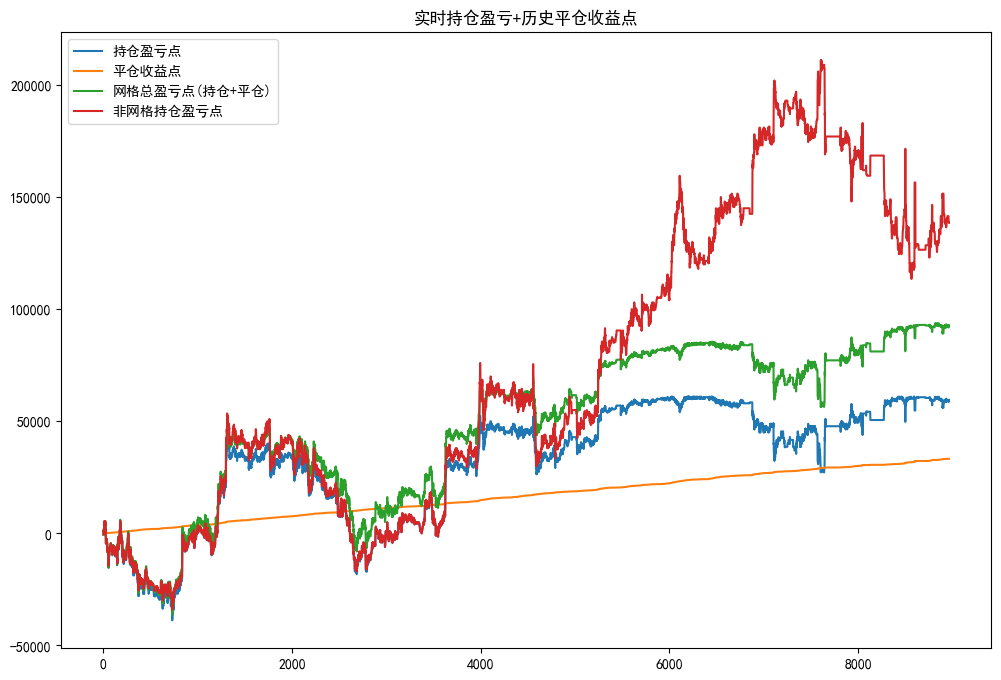

In [39]:
data[['持仓盈亏点','平仓收益点']].plot(title='实时持仓盈亏+历史平仓收益点',figsize=(12,8))
data['总盈亏点']=data['持仓盈亏点']+data['平仓收益点']
data['总盈亏点'].plot(label='网格总盈亏点(持仓+平仓)')
(data['diff_begin']*100).plot(label='非网格持仓盈亏点')
plt.legend()

In [40]:
data[['持仓盈亏点','平仓收益点','总盈亏点']].iloc[-1]

持仓盈亏点    59555.0
平仓收益点    33240.0
总盈亏点     92795.0
Name: 8963, dtype: float64

In [41]:
#网格收益占比
(data['平仓收益点']/data['总盈亏点']).iloc[-1]

0.3582089552238806

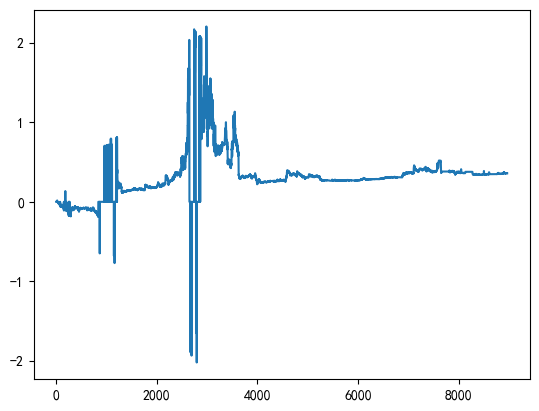

In [42]:
plt.plot(np.where(np.abs(data['总盈亏点'])>100*24*2,data['平仓收益点']/data['总盈亏点'],0))

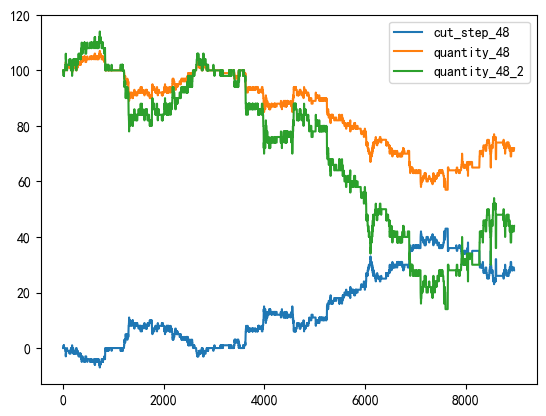

In [43]:
data['cut_step_48']=(data['diff_begin']/48).astype(int)
data['quantity_48']=100-data['cut_step_48']
data['quantity_48_2']=100-data['cut_step_48']*2

plt.plot(data['cut_step_48'],label='cut_step_48')
plt.plot(data['quantity_48'],label='quantity_48')
plt.plot(data['quantity_48_2'],label='quantity_48_2')
plt.legend()

In [45]:
data['cut_step_48'].max()

43

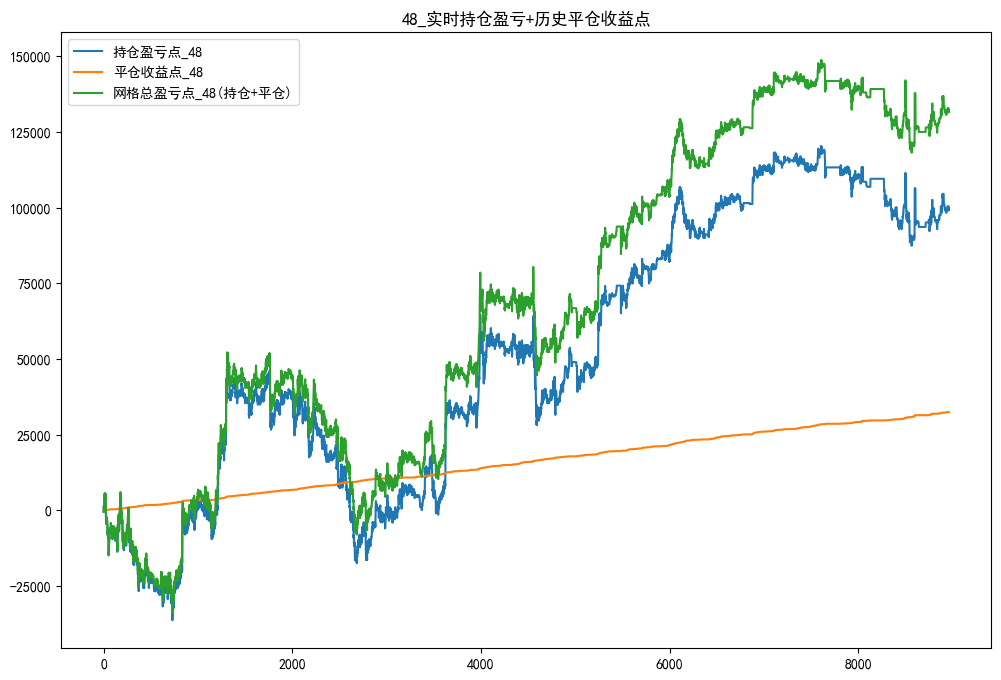

In [46]:
data['cutdiff_48']=data['cut_step_48'].diff(1)
data['持仓盈亏点_48']=data['diff_begin']*data['quantity_48']
data['持仓盈亏点_48_2']=data['diff_begin']*data['quantity_48_2']
data['平仓收益点_48']=np.where(data['cutdiff_48']>0,data['cutdiff_48']*48*1,0).cumsum()
data['平仓收益点_48_2']=np.where(data['cutdiff_48']>0,data['cutdiff_48']*48*2,0).cumsum()

data[['持仓盈亏点_48','平仓收益点_48']].plot(title='48_实时持仓盈亏+历史平仓收益点',figsize=(12,8))
(data['持仓盈亏点_48']+data['平仓收益点_48']).plot(label='网格总盈亏点_48(持仓+平仓)')
plt.legend()

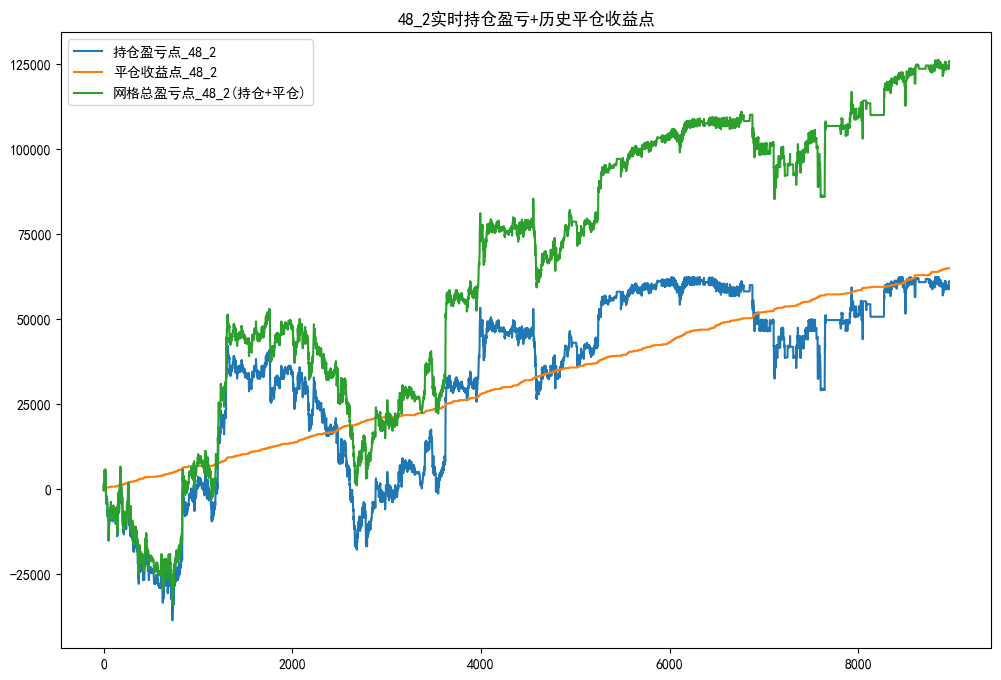

In [61]:
data[['持仓盈亏点_48_2','平仓收益点_48_2']].plot(title='48_2实时持仓盈亏+历史平仓收益点',figsize=(12,8))
(data['持仓盈亏点_48_2']+data['平仓收益点_48_2']).plot(label='网格总盈亏点_48_2(持仓+平仓)')
plt.legend()

In [48]:
data[['持仓盈亏点','平仓收益点','持仓盈亏点_48','平仓收益点_48','持仓盈亏点_48_2','平仓收益点_48_2',]].iloc[-1]

持仓盈亏点         59555.0
平仓收益点         33240.0
持仓盈亏点_48      99720.0
平仓收益点_48      32400.0
持仓盈亏点_48_2    60940.0
平仓收益点_48_2    64800.0
Name: 8963, dtype: float64

In [49]:
#网格收益占比
(data['平仓收益点_48']/(data['持仓盈亏点_48']+data['平仓收益点_48'])).iloc[-1]

0.2452316076294278

In [50]:
(data['平仓收益点_48_2']/(data['持仓盈亏点_48_2']+data['平仓收益点_48_2'])).iloc[-1]

0.5153491331318594

In [51]:
#交易总步数
np.abs(data['cutdiff_48']).sum()

1322.0

In [52]:
1322*48

63456

In [53]:
#交易总次数
np.abs(np.sign(data['cutdiff_48'])).sum()

1249.0

<Axes: xlabel='cutdiff_48'>

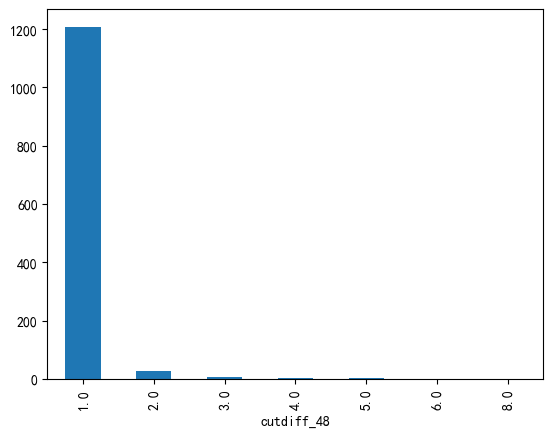

In [54]:
np.abs(data['cutdiff_48']).value_counts().sort_index()[1:].plot.bar()

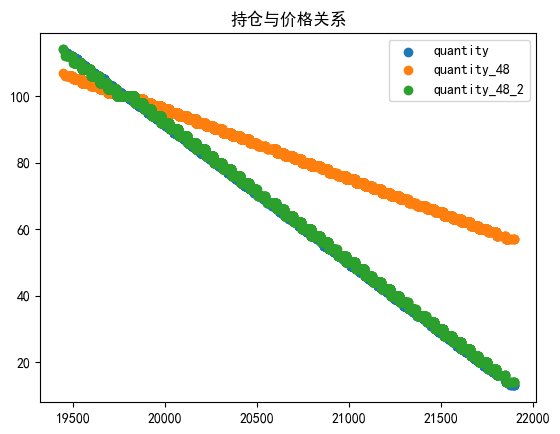

In [62]:
plt.scatter(data['close'],data['quantity'],label='quantity')
plt.scatter(data['close'],data['quantity_48'],label='quantity_48')
plt.scatter(data['close'],data['quantity_48_2'],label='quantity_48_2')
plt.title('持仓与价格关系')
plt.legend()

<Axes: title={'center': '平仓收益点比较'}>

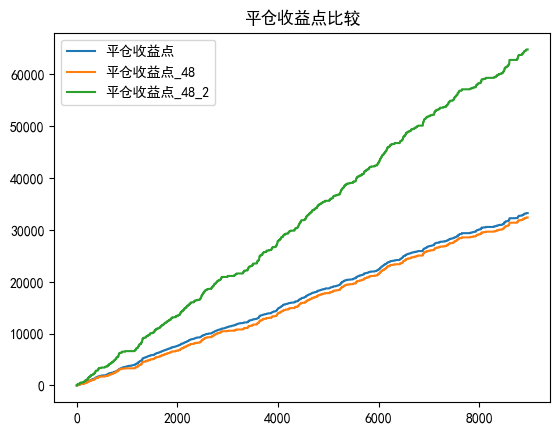

In [55]:
data[['平仓收益点','平仓收益点_48','平仓收益点_48_2']].plot(title='平仓收益点比较')

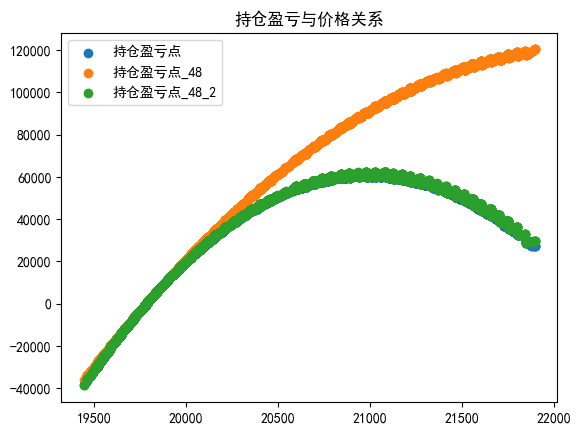

In [56]:
plt.scatter(data['close'],data['持仓盈亏点'],label='持仓盈亏点')
plt.scatter(data['close'],data['持仓盈亏点_48'],label='持仓盈亏点_48')
plt.scatter(data['close'],data['持仓盈亏点_48_2'],label='持仓盈亏点_48_2')
plt.title('持仓盈亏与价格关系')
plt.legend()

Text(0.5, 1.0, '切分信号相关性')

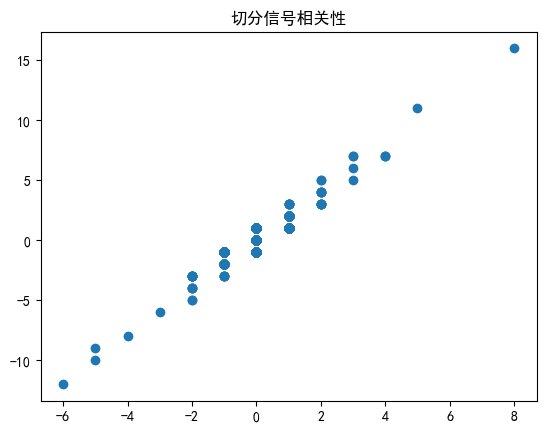

In [57]:
plt.scatter(data['cutdiff_48'],data['cutdiff'])
plt.title('切分信号相关性')

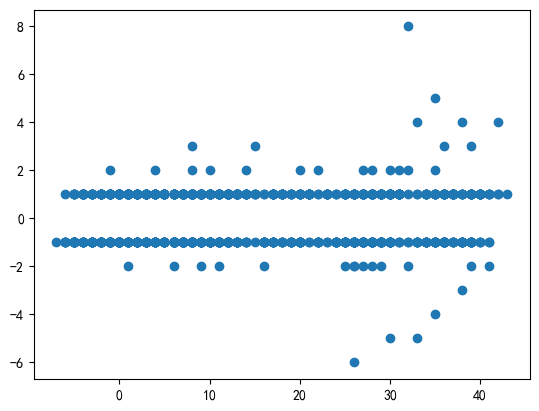

In [58]:
plt.scatter(data['cut_step_48'],data['cutdiff_48'].replace(0,np.nan))

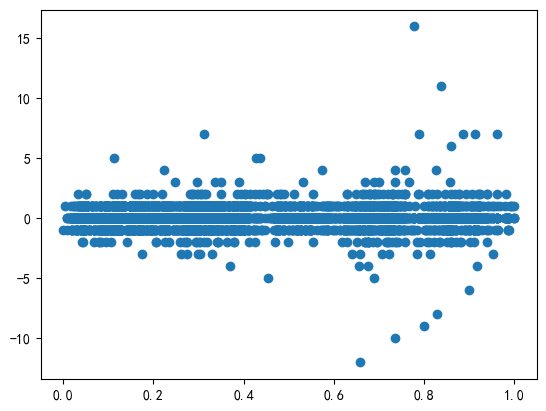

In [59]:
plt.scatter(data['norm'],data['cutdiff'])

In [60]:
data.to_excel('data\SHFE_al2201_sign.xlsx')